In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1998-01-31 00:00:00,0.131980,#VALUE!,#VALUE!,0.405000,0.660023,0.671127,0.708245,0.624016,0.706001,0.000000,0.561522,0.173089,0.617685,0.318823,0.420055,0.242360,0.498648,1
1,1998-02-28 00:00:00,0.076142,#VALUE!,#VALUE!,0.779222,0.633513,0.691848,0.573015,0.616500,0.623432,0.000000,0.394141,0.231658,0.586884,0.243321,0.350215,0.261704,0.463807,1
2,1998-03-31 00:00:00,0.055838,#VALUE!,#VALUE!,0.576556,0.528896,0.602060,0.584834,0.246242,0.601879,0.033368,0.466896,0.175247,0.416437,0.193492,0.331136,0.197741,0.461774,1
3,1998-04-30 00:00:00,0.055838,#VALUE!,#VALUE!,0.442333,0.439477,0.484645,0.552395,0.000000,0.459356,0.020775,0.486104,0.228268,0.480389,0.081423,0.331909,0.134753,0.442481,3
4,1998-05-31 00:00:00,0.010152,#VALUE!,#VALUE!,0.617444,0.652790,0.453564,0.575822,0.000000,0.307336,0.069822,0.521219,0.112978,0.418787,0.085781,0.332143,0.201886,0.450922,3


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              233 non-null    object 
 1   OAS                               190 non-null    float64
 2   Excess Return % 3-mo (Treasury)   233 non-null    float64
 3   Excess Return % 3-mo (Agg)        233 non-null    float64
 4   Excess Return % 6-mo (Treasury)   233 non-null    float64
 5   Excess Return % 6-mo (Agg)        233 non-null    float64
 6   Excess Return % 9-mo (Treasury)   233 non-null    float64
 7   Excess Return % 9-mo (Agg)        233 non-null    float64
 8   Excess Return % 12-mo (Treasury)  233 non-null    float64
 9   Excess Return % 12-mo (Agg)       233 non-null    float64
 10  Excess Return % 24-mo (Treasury)  233 non-null    float64
 11  Excess Return % 24-mo (Agg)       233 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.41624365500000005


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.638250,0.531398,0.506175,0.559255,0.516100,0.570985,0.468315,0.629742,0.532382,0.687975,0.509746,0.659644,0.539943,2.558824
std,0.192291,0.330520,0.280529,0.329943,0.308593,0.326126,0.287126,0.253427,0.273238,0.238922,0.161773,0.181860,0.117064,0.894128
min,0.431472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386297,0.352019,1.000000
25%,0.463198,0.305439,0.277570,0.388824,0.371585,0.329184,0.269480,0.546432,0.351825,0.559516,0.417282,0.514650,0.466907,2.000000
50%,0.555838,0.589850,0.555427,0.638243,0.561709,0.625000,0.516391,0.644189,0.521939,0.708365,0.541073,0.606957,0.516963,3.000000
75%,0.819797,0.779230,0.711389,0.799213,0.710187,0.747370,0.721417,0.778977,0.746682,0.860672,0.624234,0.814471,0.600221,3.000000
max,0.979695,1.000000,1.000000,1.000000,1.000000,1.000000,0.874945,1.000000,0.973051,1.000000,0.733938,1.000000,0.767555,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 3-mo (Treasury)  34.0  0.531398  0.330520  0.056684   
 2                         combined  68.0  0.584824  0.273706  0.033192   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.416074  0.646722  
 2   0.518573  0.651075  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.1069
 1                              Degrees of freedom =   66.0000
 2                                               t =    1.6294
 3                           Two side test p value =    0.1080
 4                          Difference < 0 p value =    0.9460
 5                          Difference > 0 p value =    0.0540
 6                                       Cohen's d =    0.3952
 7                                       Hedge's g =    0.3907
 8                        

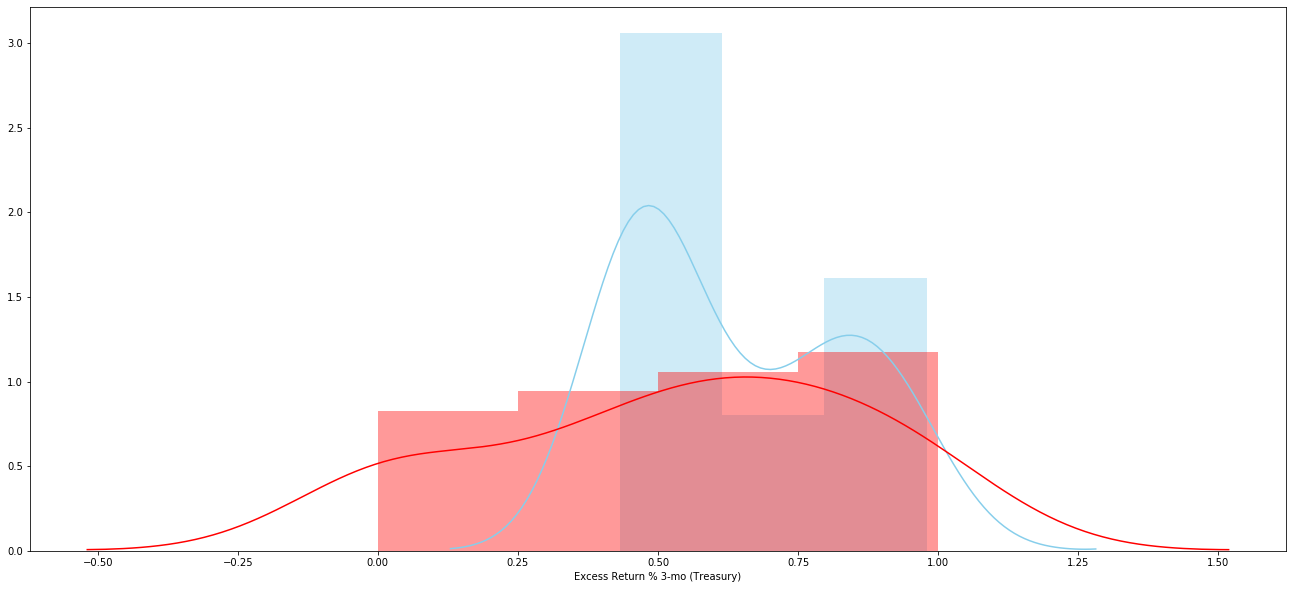

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 3-mo (Agg)  34.0  0.506175  0.280529  0.048110   0.408294   
 2                    combined  68.0  0.572213  0.247788  0.030049   0.512235   
 
    Interval  
 0  0.705344  
 1  0.604056  
 2  0.632190  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1321
 1                             Degrees of freedom =   66.0000
 2                                              t =    2.2644
 3                          Two side test p value =    0.0268
 4                         Difference < 0 p value =    0.9866
 5                         Difference > 0 p value =    0.0134
 6                                      Cohen's d =    0.5492
 7                                      Hedge's g =    0.5429
 8                                  Glass's delta =    

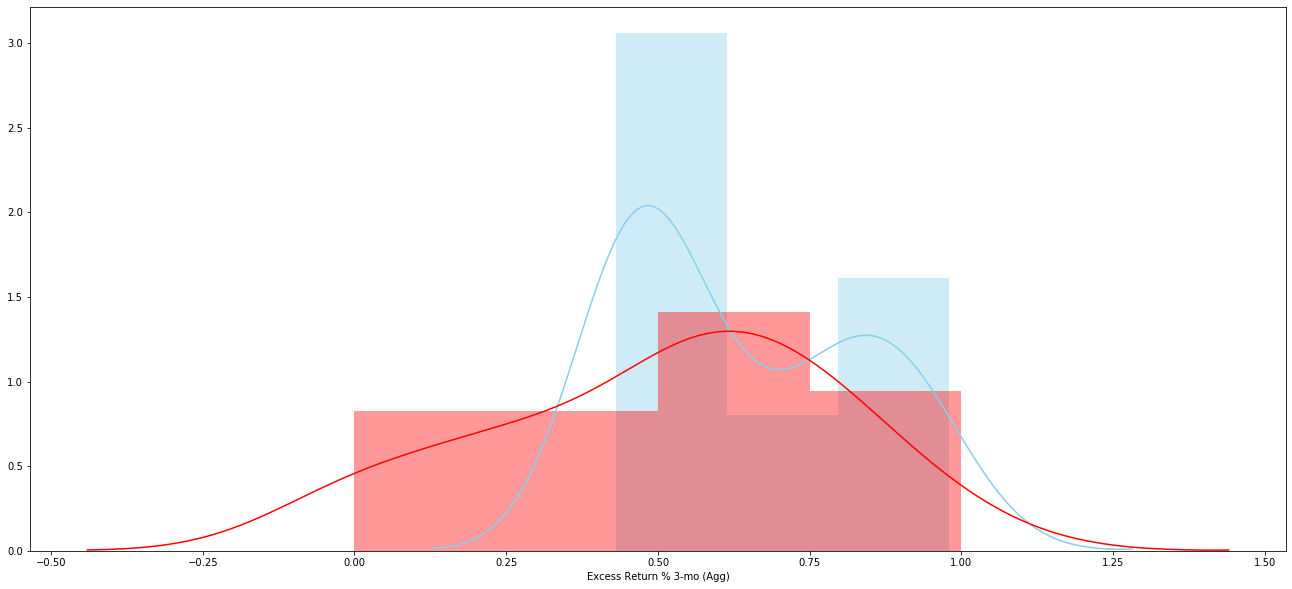

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 6-mo (Treasury)  34.0  0.559255  0.329943  0.056585   
 2                         combined  68.0  0.598753  0.270950  0.032858   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.444133  0.674378  
 2   0.533169  0.664337  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.0790
 1                              Degrees of freedom =   66.0000
 2                                               t =    1.2062
 3                           Two side test p value =    0.2321
 4                          Difference < 0 p value =    0.8840
 5                          Difference > 0 p value =    0.1160
 6                                       Cohen's d =    0.2925
 7                                       Hedge's g =    0.2892
 8                        

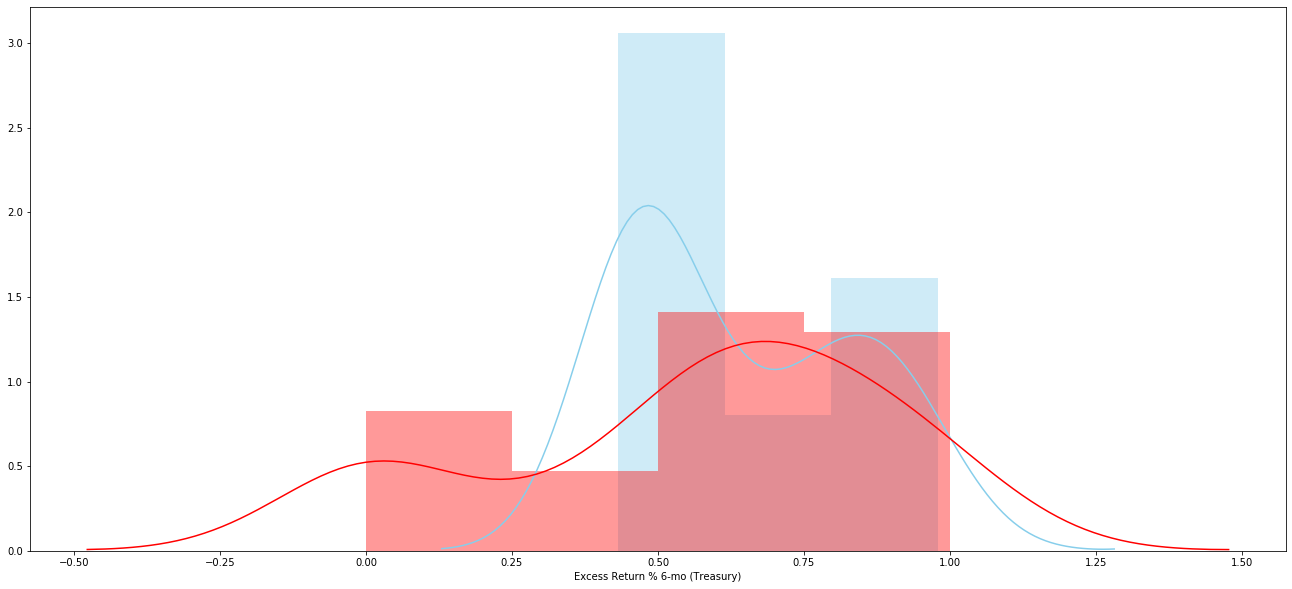

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 6-mo (Agg)  34.0  0.516100  0.308593  0.052923   0.408427   
 2                    combined  68.0  0.577175  0.262492  0.031832   0.513638   
 
    Interval  
 0  0.705344  
 1  0.623773  
 2  0.640711  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1222
 1                             Degrees of freedom =   66.0000
 2                                              t =    1.9589
 3                          Two side test p value =    0.0544
 4                         Difference < 0 p value =    0.9728
 5                         Difference > 0 p value =    0.0272
 6                                      Cohen's d =    0.4751
 7                                      Hedge's g =    0.4697
 8                                  Glass's delta =    

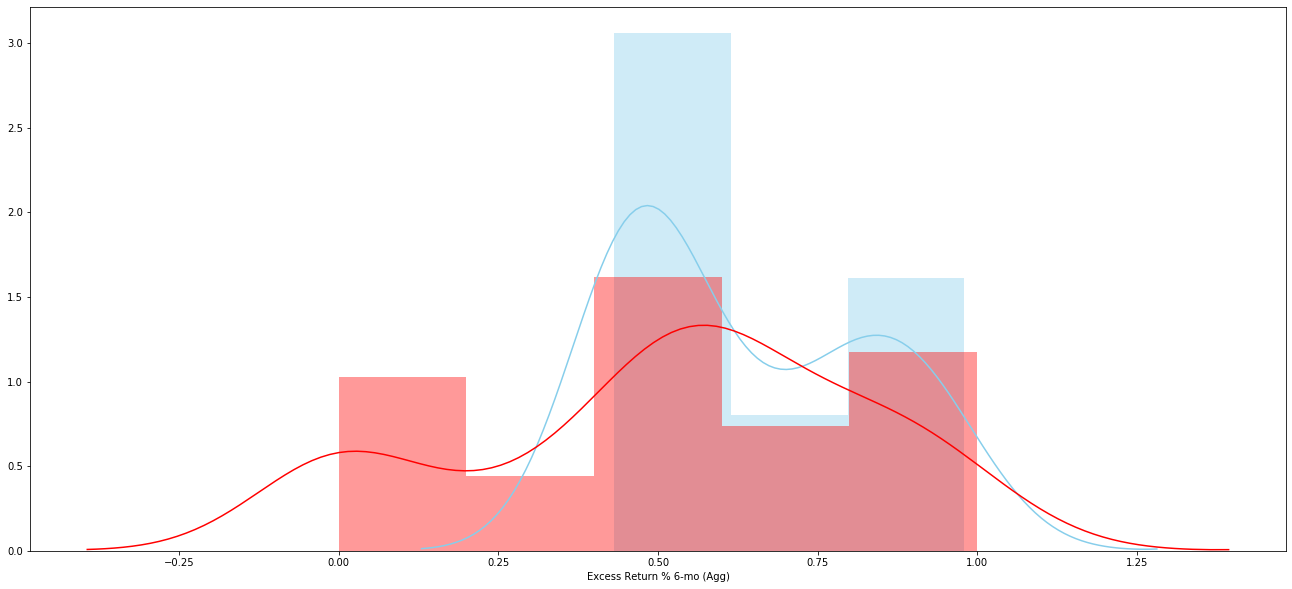

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 9-mo (Treasury)  34.0  0.570985  0.326126  0.055930   
 2                         combined  68.0  0.604618  0.267853  0.032482   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.457194  0.684776  
 2   0.539783  0.669452  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.0673
 1                              Degrees of freedom =   66.0000
 2                                               t =    1.0360
 3                           Two side test p value =    0.3040
 4                          Difference < 0 p value =    0.8480
 5                          Difference > 0 p value =    0.1520
 6                                       Cohen's d =    0.2513
 7                                       Hedge's g =    0.2484
 8                        

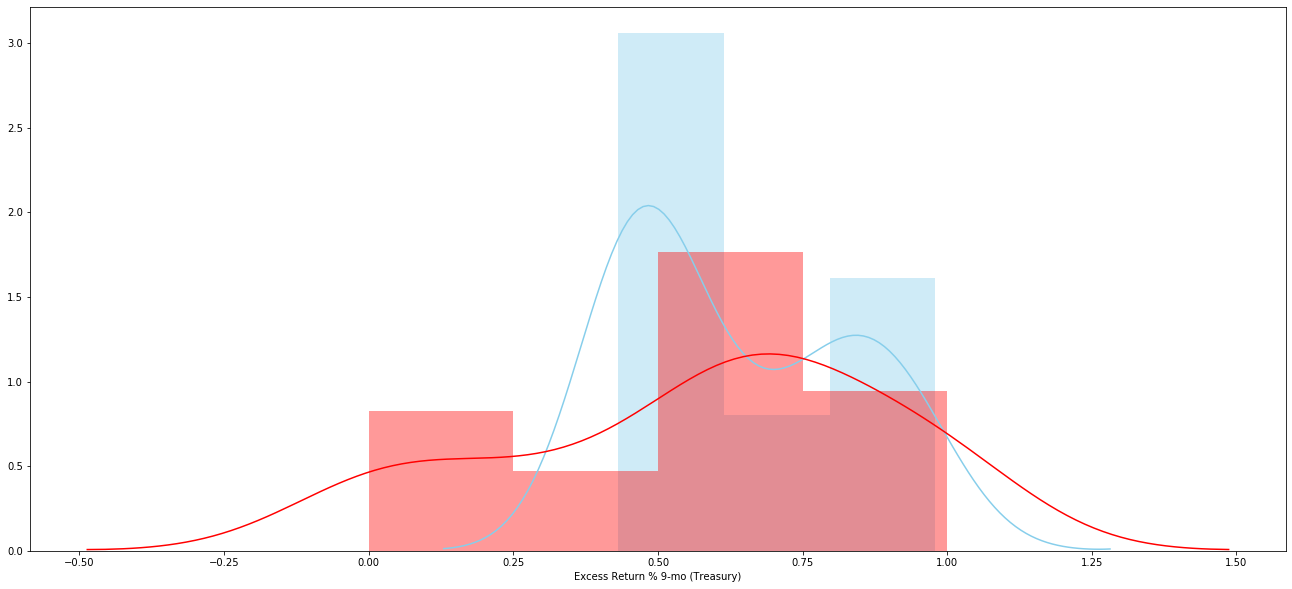

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 9-mo (Agg)  34.0  0.468315  0.287126  0.049242   0.368132   
 2                    combined  68.0  0.553282  0.257186  0.031188   0.491030   
 
    Interval  
 0  0.705344  
 1  0.568498  
 2  0.615535  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1699
 1                             Degrees of freedom =   66.0000
 2                                              t =    2.8674
 3                          Two side test p value =    0.0055
 4                         Difference < 0 p value =    0.9972
 5                         Difference > 0 p value =    0.0028
 6                                      Cohen's d =    0.6955
 7                                      Hedge's g =    0.6875
 8                                  Glass's delta =    

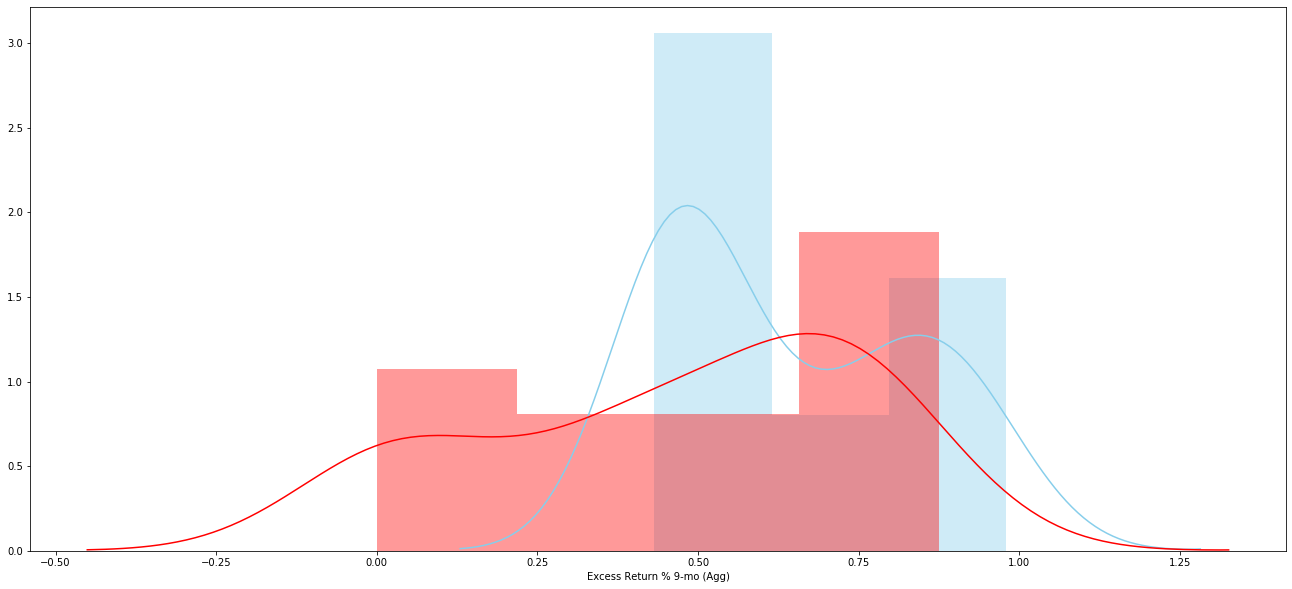

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 12-mo (Treasury)  34.0  0.629742  0.253427  0.043462   
 2                          combined  68.0  0.633996  0.223302  0.027079   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.541317  0.718167  
 2   0.579946  0.688046  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.0085
 1                              Degrees of freedom =   66.0000
 2                                               t =    0.1560
 3                           Two side test p value =    0.8765
 4                          Difference < 0 p value =    0.5617
 5                          Difference > 0 p value =    0.4383
 6                                       Cohen's d =    0.0378
 7                                       Hedge's g =    0.0374
 8                    

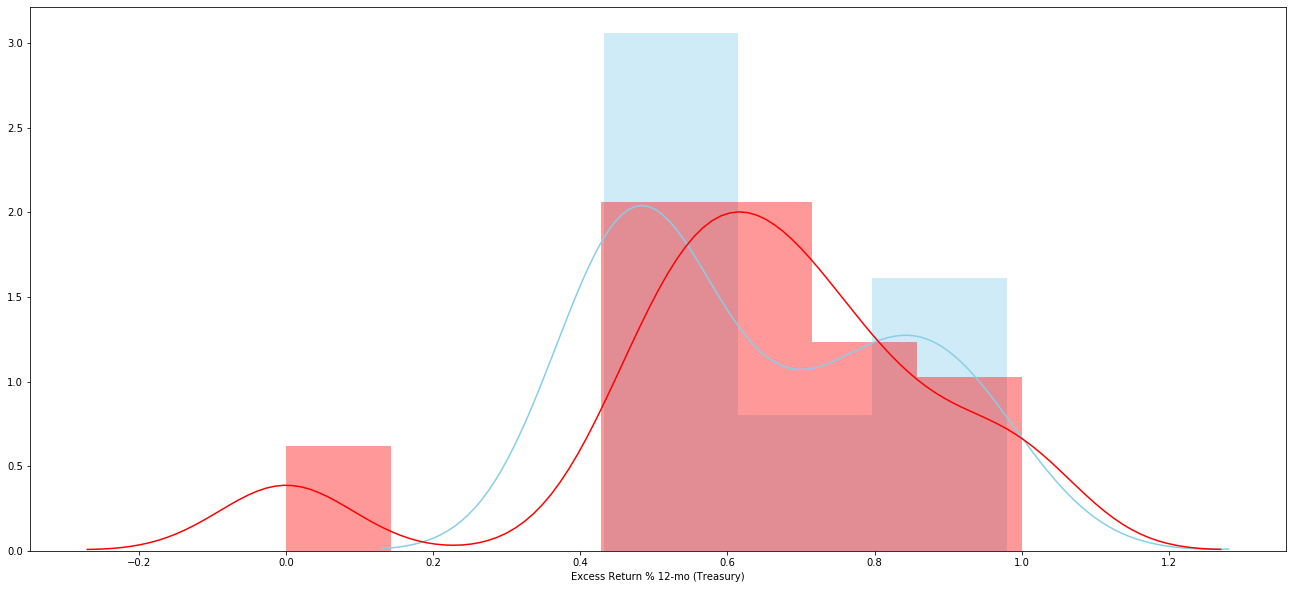

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 12-mo (Agg)  34.0  0.532382  0.273238  0.046860   0.437045   
 2                     combined  68.0  0.585316  0.240475  0.029162   0.527109   
 
    Interval  
 0  0.705344  
 1  0.627720  
 2  0.643524  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1059
 1                              Degrees of freedom =   66.0000
 2                                               t =    1.8476
 3                           Two side test p value =    0.0691
 4                          Difference < 0 p value =    0.9654
 5                          Difference > 0 p value =    0.0346
 6                                       Cohen's d =    0.4481
 7                                       Hedge's g =    0.4430
 8                                   Glass

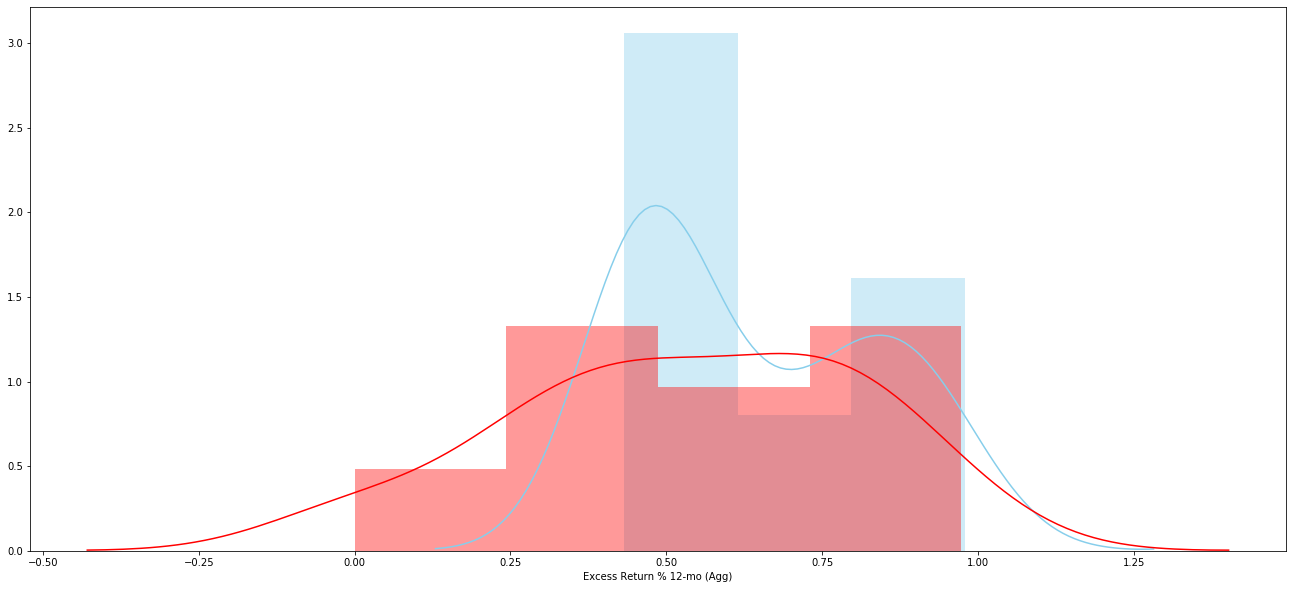

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 24-mo (Treasury)  34.0  0.687975  0.238922  0.040975   
 2                          combined  68.0  0.663113  0.216691  0.026278   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.604611  0.771339  
 2   0.610662  0.715563  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...  -0.0497
 1                              Degrees of freedom =   66.0000
 2                                               t =   -0.9454
 3                           Two side test p value =    0.3479
 4                          Difference < 0 p value =    0.1740
 5                          Difference > 0 p value =    0.8260
 6                                       Cohen's d =   -0.2293
 7                                       Hedge's g =   -0.2267
 8                    

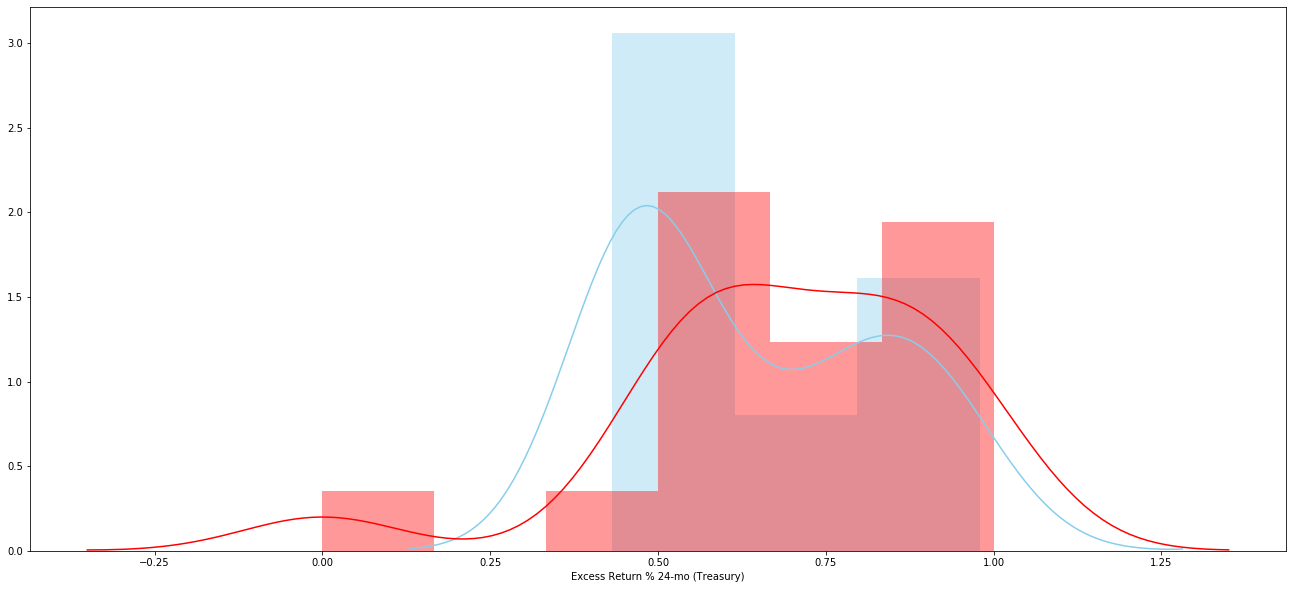

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 24-mo (Agg)  34.0  0.509746  0.161773  0.027744   0.453301   
 2                     combined  68.0  0.573998  0.187861  0.022781   0.528526   
 
    Interval  
 0  0.705344  
 1  0.566191  
 2  0.619470  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1285
 1                              Degrees of freedom =   66.0000
 2                                               t =    2.9818
 3                           Two side test p value =    0.0040
 4                          Difference < 0 p value =    0.9980
 5                          Difference > 0 p value =    0.0020
 6                                       Cohen's d =    0.7232
 7                                       Hedge's g =    0.7150
 8                                   Glass

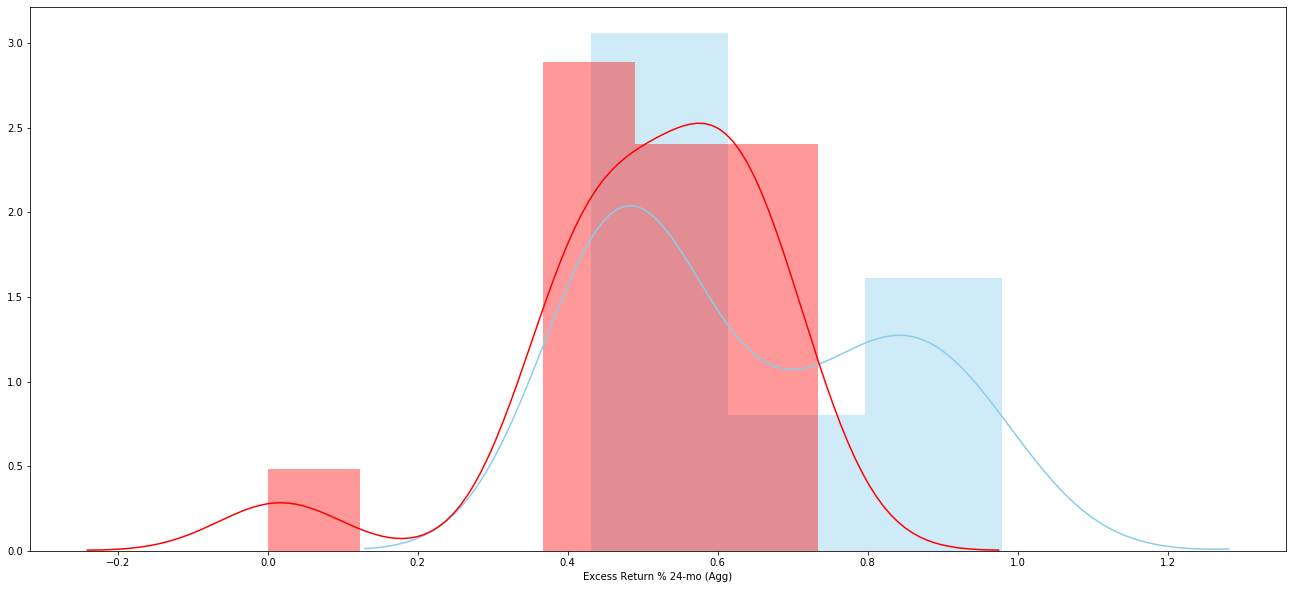

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 36-mo (Treasury)  34.0  0.659644  0.181860  0.031189   
 2                          combined  68.0  0.648947  0.186058  0.022563   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.596190  0.723098  
 2   0.603912  0.693983  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...  -0.0214
 1                              Degrees of freedom =   66.0000
 2                                               t =   -0.4713
 3                           Two side test p value =    0.6390
 4                          Difference < 0 p value =    0.3195
 5                          Difference > 0 p value =    0.6805
 6                                       Cohen's d =   -0.1143
 7                                       Hedge's g =   -0.1130
 8                    

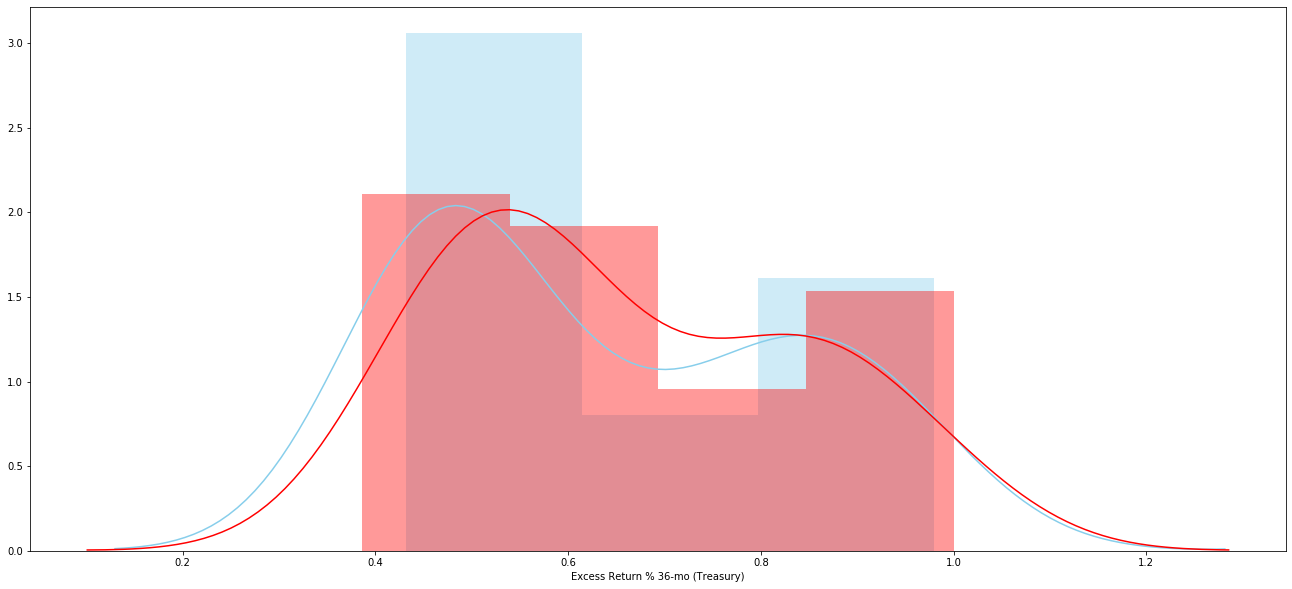

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 36-mo (Agg)  34.0  0.539943  0.117064  0.020076   0.499098   
 2                     combined  68.0  0.589097  0.165571  0.020078   0.549020   
 
    Interval  
 0  0.705344  
 1  0.580789  
 2  0.629173  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.0983
 1                              Degrees of freedom =   66.0000
 2                                               t =    2.5463
 3                           Two side test p value =    0.0132
 4                          Difference < 0 p value =    0.9934
 5                          Difference > 0 p value =    0.0066
 6                                       Cohen's d =    0.6176
 7                                       Hedge's g =    0.6105
 8                                   Glass

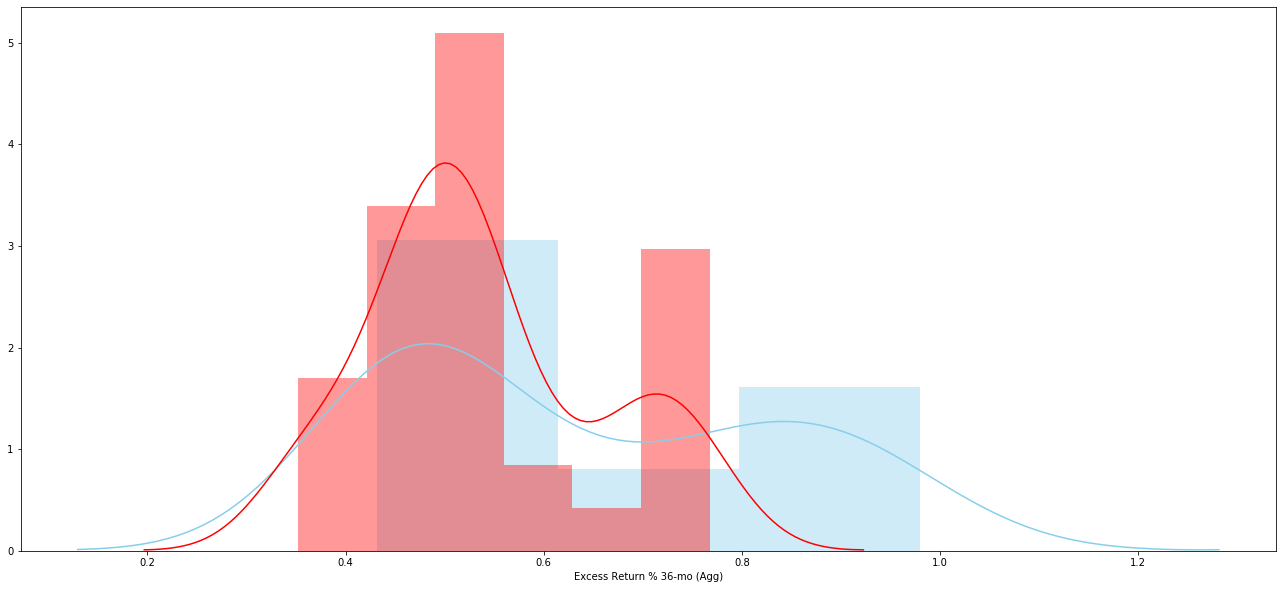

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,267.000000,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.497822,0.503905,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.255197,0.234098,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.374333,0.376337,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.494333,0.495460,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.622111,0.625106,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 3-mo (Treasury)  266.0  0.508826  0.260708  0.015985   
 2                         combined  300.0  0.523494  0.256923  0.014833   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.477352  0.540300  
 2   0.494303  0.552685  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1294
 1                              Degrees of freedom =   298.0000
 2                                               t =     2.7973
 3                           Two side test p value =     0.0055
 4                          Difference < 0 p value =     0.9973
 5                          Difference > 0 p value =     0.0027
 6                                       Cohen's d =     0.5095
 7                                       Hedge's g =     0.5082
 8           

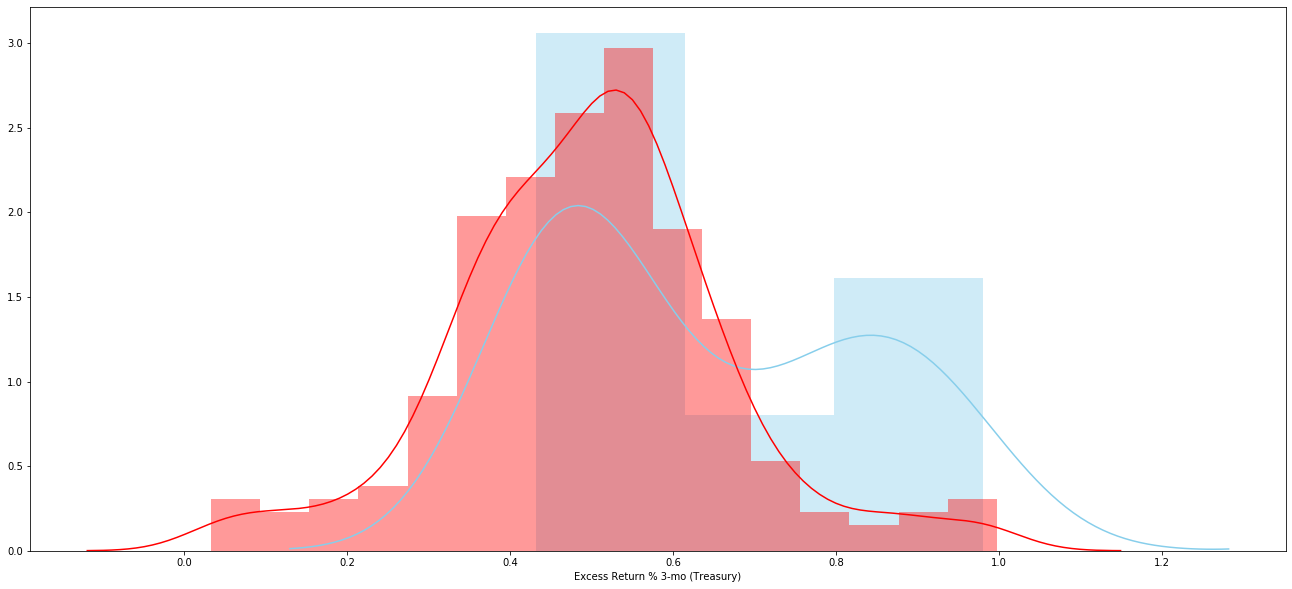

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 3-mo (Agg)  266.0  0.507331  0.243181  0.014910   0.477974   
 2                    combined  300.0  0.522169  0.241291  0.013931   0.494754   
 
    Interval  
 0  0.705344  
 1  0.536689  
 2  0.549584  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1309
 1                             Degrees of freedom =   298.0000
 2                                              t =     3.0192
 3                          Two side test p value =     0.0028
 4                         Difference < 0 p value =     0.9986
 5                         Difference > 0 p value =     0.0014
 6                                      Cohen's d =     0.5499
 7                                      Hedge's g =     0.5485
 8                                  Glass'

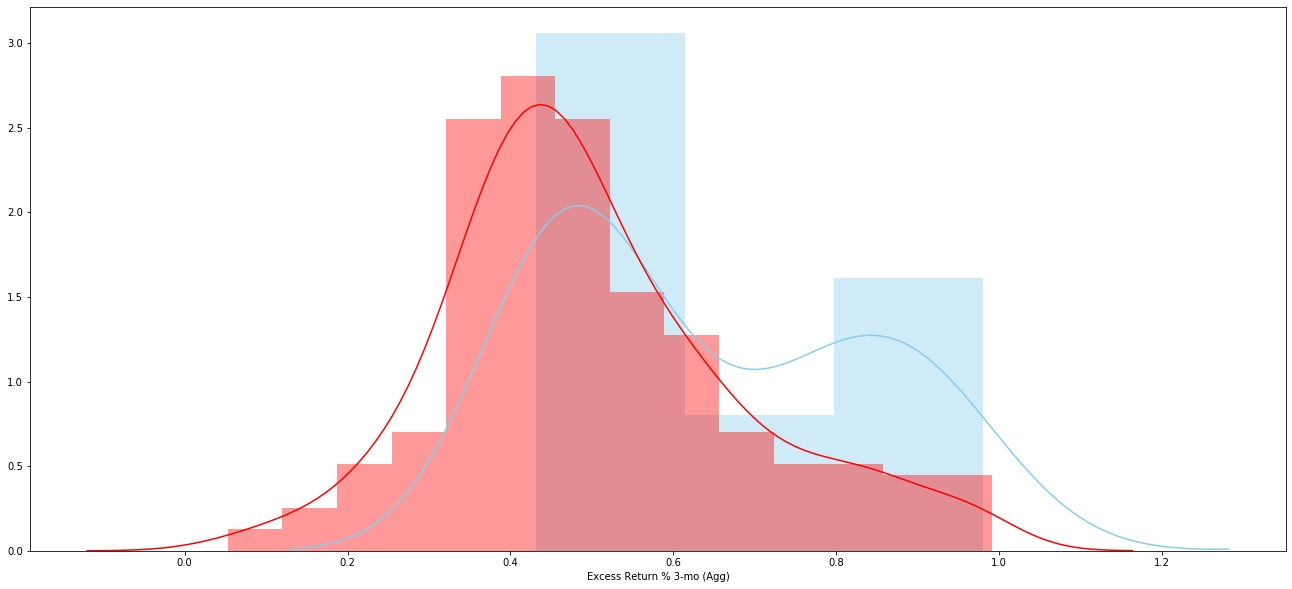

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 6-mo (Treasury)  263.0  0.502922  0.274559  0.016930   
 2                         combined  297.0  0.518414  0.269646  0.015646   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.469586  0.536258  
 2   0.487622  0.549206  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1353
 1                              Degrees of freedom =   295.0000
 2                                               t =     2.7851
 3                           Two side test p value =     0.0057
 4                          Difference < 0 p value =     0.9972
 5                          Difference > 0 p value =     0.0028
 6                                       Cohen's d =     0.5076
 7                                       Hedge's g =     0.5063
 8           

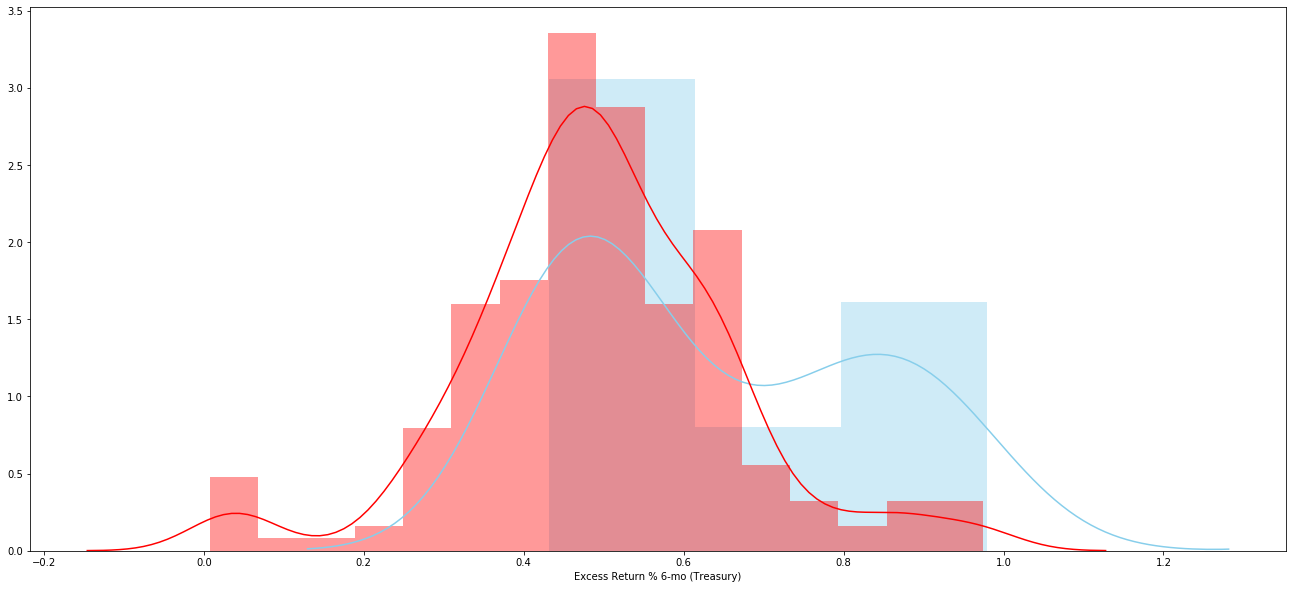

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 6-mo (Agg)  263.0  0.510516  0.258519  0.015941   0.479127   
 2                    combined  297.0  0.525139  0.254828  0.014787   0.496038   
 
    Interval  
 0  0.705344  
 1  0.541904  
 2  0.554239  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1277
 1                             Degrees of freedom =   295.0000
 2                                              t =     2.7815
 3                          Two side test p value =     0.0058
 4                         Difference < 0 p value =     0.9971
 5                         Difference > 0 p value =     0.0029
 6                                      Cohen's d =     0.5069
 7                                      Hedge's g =     0.5056
 8                                  Glass'

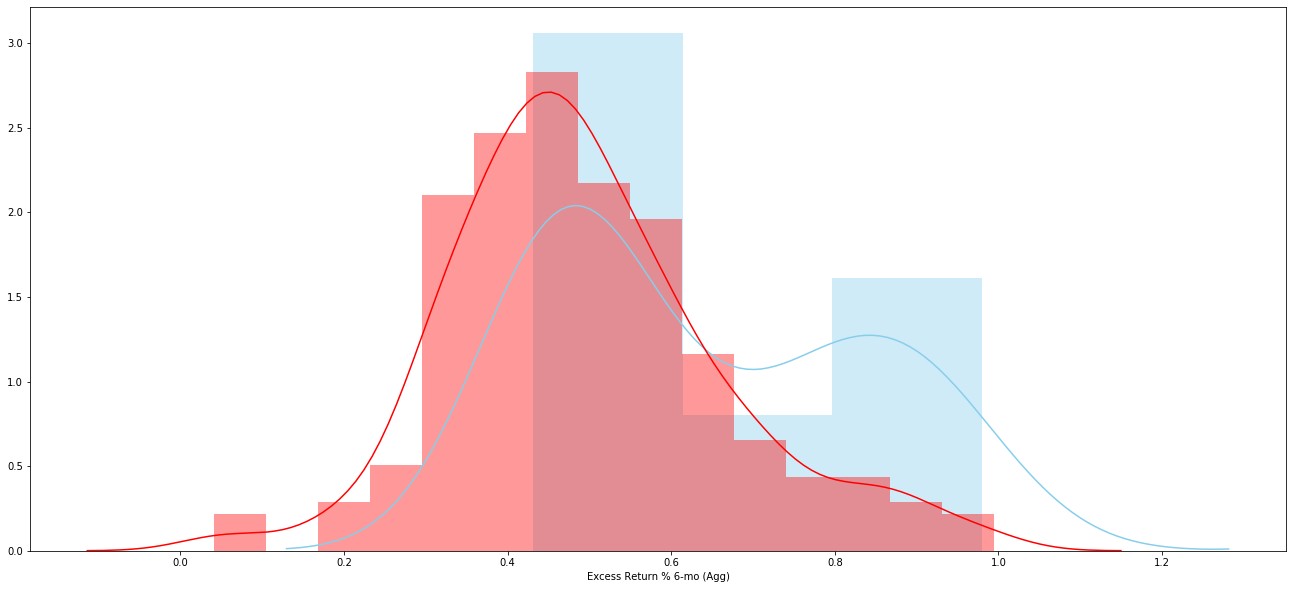

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 9-mo (Treasury)  260.0  0.503568  0.283993  0.017613   
 2                         combined  294.0  0.519144  0.278063  0.016217   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.468886  0.538250  
 2   0.487227  0.551060  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1347
 1                              Degrees of freedom =   292.0000
 2                                               t =     2.6839
 3                           Two side test p value =     0.0077
 4                          Difference < 0 p value =     0.9962
 5                          Difference > 0 p value =     0.0038
 6                                       Cohen's d =     0.4895
 7                                       Hedge's g =     0.4882
 8           

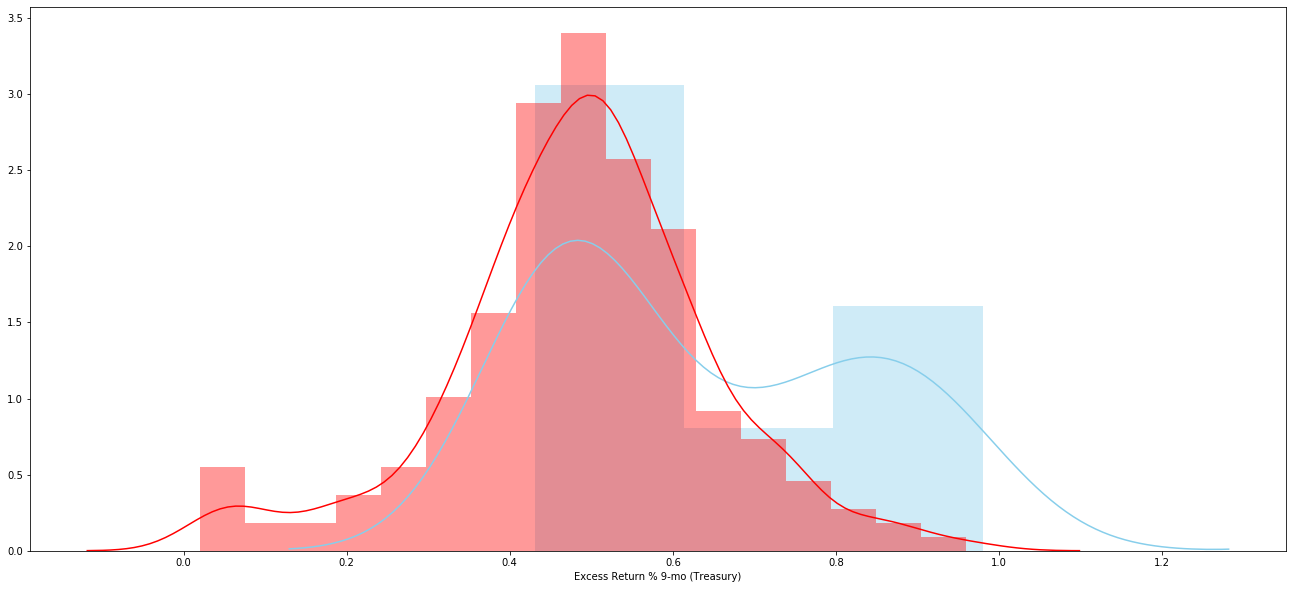

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   34.0  0.638250  0.192291  0.032978   0.571157   
 1  Excess Return % 9-mo (Agg)  260.0  0.489132  0.249247  0.015458   0.458693   
 2                    combined  294.0  0.506377  0.247713  0.014447   0.477944   
 
    Interval  
 0  0.705344  
 1  0.519570  
 2  0.534810  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1491
 1                             Degrees of freedom =   292.0000
 2                                              t =     3.3583
 3                          Two side test p value =     0.0009
 4                         Difference < 0 p value =     0.9996
 5                         Difference > 0 p value =     0.0004
 6                                      Cohen's d =     0.6124
 7                                      Hedge's g =     0.6109
 8                                  Glass'

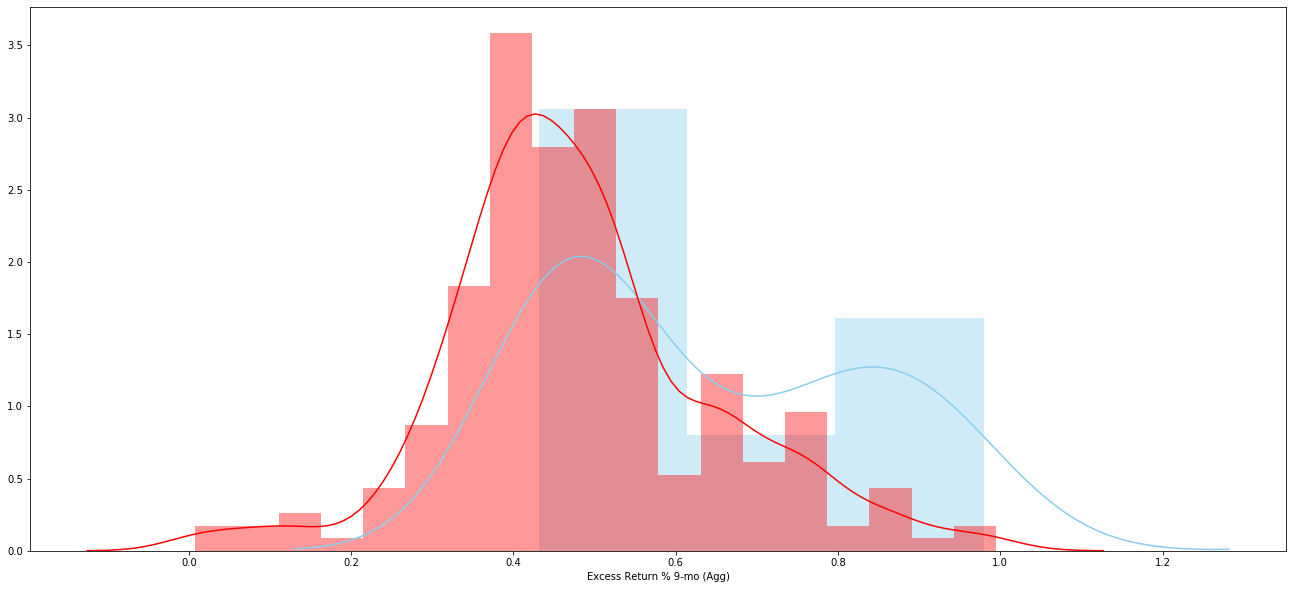

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 12-mo (Treasury)  257.0  0.511401  0.276018  0.017217   
 2                          combined  291.0  0.526222  0.270420  0.015852   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.477495  0.545307  
 2   0.495022  0.557422  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1268
 1                              Degrees of freedom =   289.0000
 2                                               t =     2.5957
 3                           Two side test p value =     0.0099
 4                          Difference < 0 p value =     0.9950
 5                          Difference > 0 p value =     0.0050
 6                                       Cohen's d =     0.4737
 7                                       Hedge's g =     0.4725
 8       

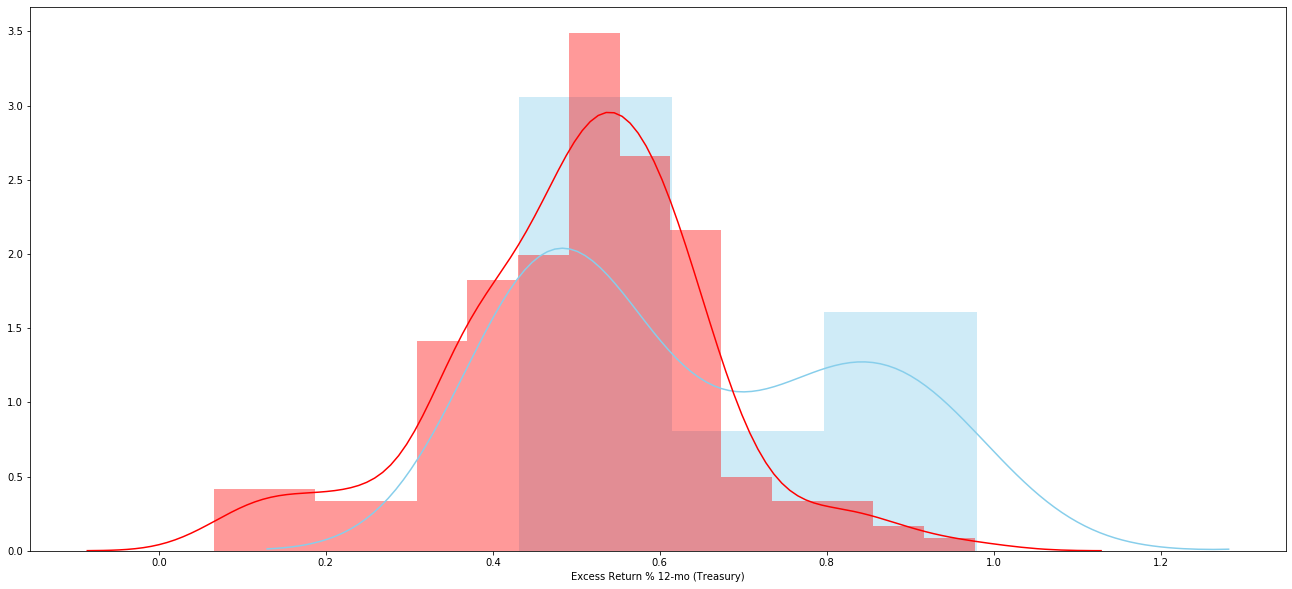

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 12-mo (Agg)  257.0  0.510328  0.263561  0.016440   
 2                     combined  291.0  0.525274  0.259272  0.015199   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.477952  0.542704  
 2   0.495360  0.555188  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1279
 1                              Degrees of freedom =   289.0000
 2                                               t =     2.7336
 3                           Two side test p value =     0.0067
 4                          Difference < 0 p value =     0.9967
 5                          Difference > 0 p value =     0.0033
 6                                       Cohen's d =     0.4989
 7                                       Hedge's g =     0.4976
 8                           

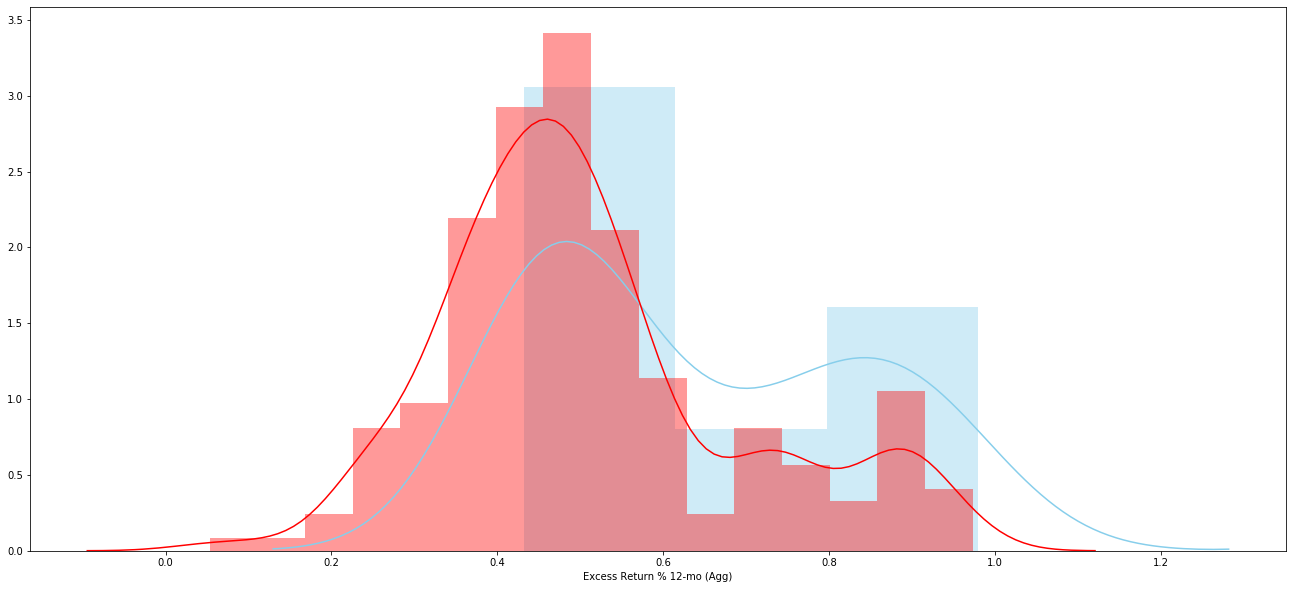

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 24-mo (Treasury)  245.0  0.513404  0.296969  0.018973   
 2                          combined  279.0  0.528618  0.288908  0.017296   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.476033  0.550775  
 2   0.494569  0.562667  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1248
 1                              Degrees of freedom =   277.0000
 2                                               t =     2.3810
 3                           Two side test p value =     0.0179
 4                          Difference < 0 p value =     0.9910
 5                          Difference > 0 p value =     0.0090
 6                                       Cohen's d =     0.4357
 7                                       Hedge's g =     0.4346
 8       

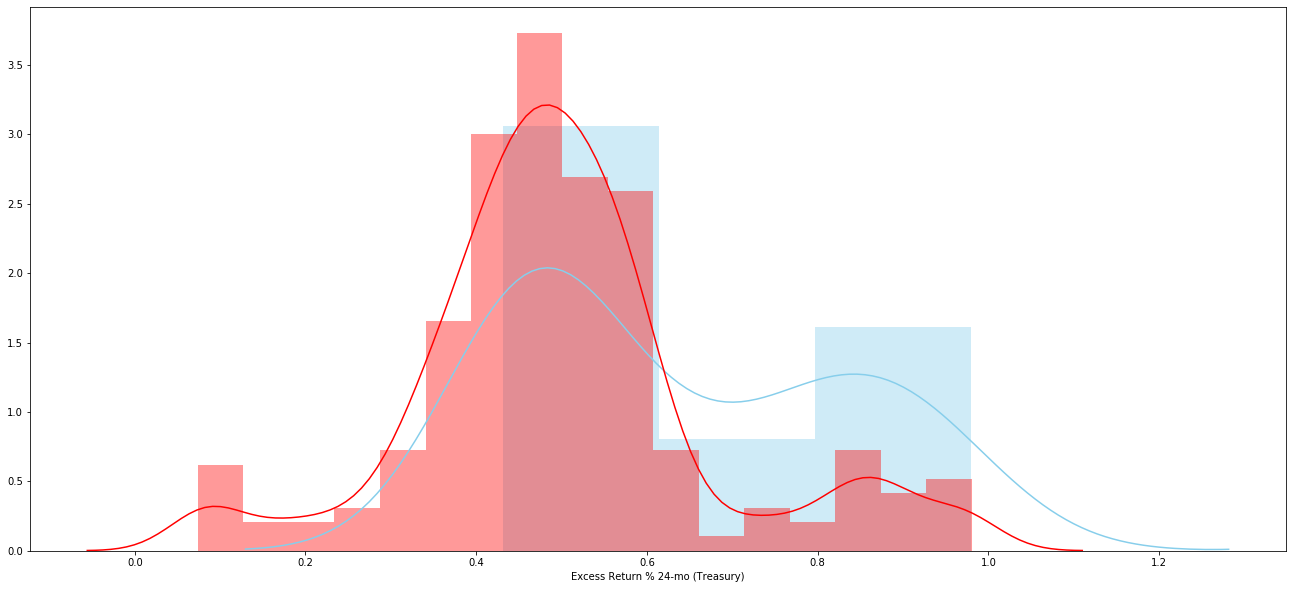

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 24-mo (Agg)  245.0  0.476935  0.226476  0.014469   
 2                     combined  279.0  0.496593  0.228478  0.013679   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.448434  0.505435  
 2   0.469666  0.523520  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1613
 1                              Degrees of freedom =   277.0000
 2                                               t =     3.9584
 3                           Two side test p value =     0.0001
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7244
 7                                       Hedge's g =     0.7225
 8                           

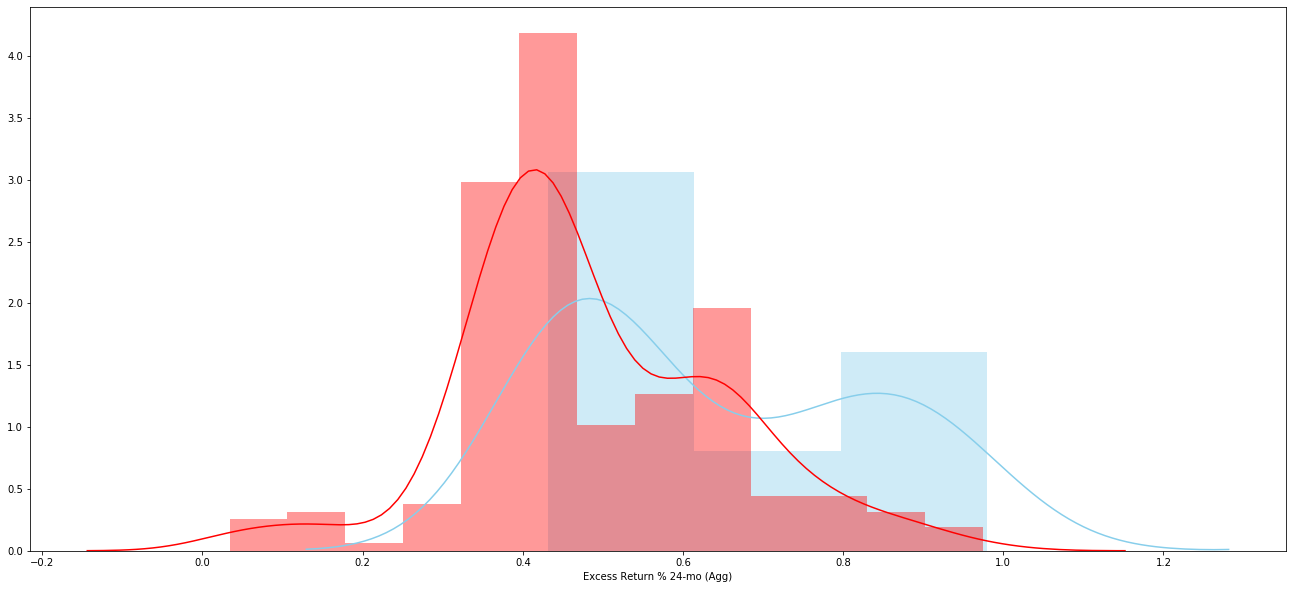

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 36-mo (Treasury)  233.0  0.502615  0.312065  0.020444   
 2                          combined  267.0  0.519887  0.302616  0.018520   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.462335  0.542895  
 2   0.483423  0.556351  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1356
 1                              Degrees of freedom =   265.0000
 2                                               t =     2.4646
 3                           Two side test p value =     0.0144
 4                          Difference < 0 p value =     0.9928
 5                          Difference > 0 p value =     0.0072
 6                                       Cohen's d =     0.4525
 7                                       Hedge's g =     0.4512
 8       

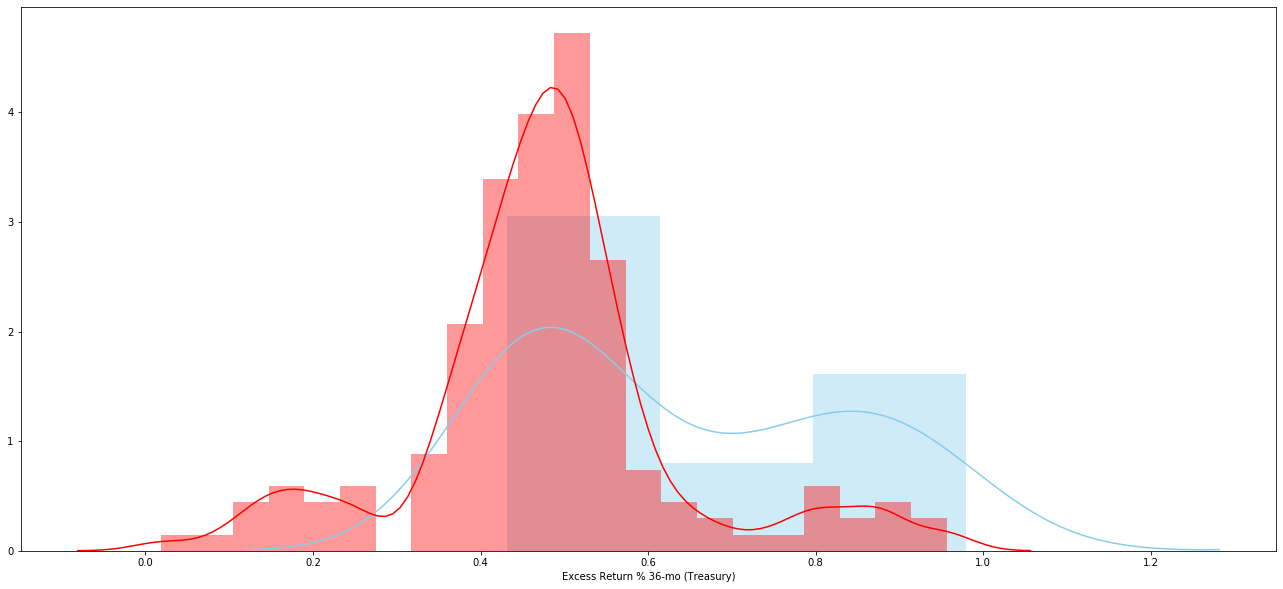

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   34.0  0.638250  0.192291  0.032978   
 1  Excess Return % 36-mo (Agg)  233.0  0.482371  0.234052  0.015333   
 2                     combined  267.0  0.502221  0.234682  0.014362   
 
    95% Conf.  Interval  
 0   0.571157  0.705344  
 1   0.452161  0.512581  
 2   0.473943  0.530499  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.1559
 1                              Degrees of freedom =   265.0000
 2                                               t =     3.7035
 3                           Two side test p value =     0.0003
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.6799
 7                                       Hedge's g =     0.6780
 8                           

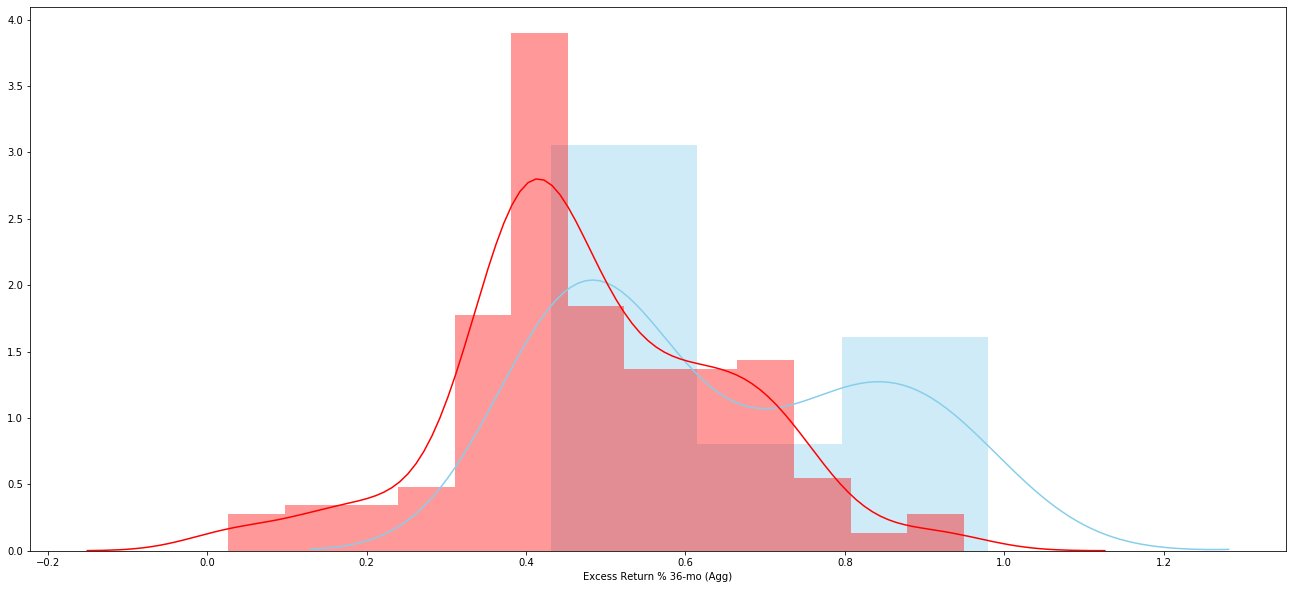

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")